In [1]:
import os
print(os.getcwd())

/content


In [3]:
import zipfile
import os
import pandas as pd
import torch as t  # optional, used later in ML if needed

# Step 1: Define the zip file path
zip_path = '/content/Ohio Data.zip'

# Step 2: Define the extraction target path
extract_to = '/content'

# Step 3: Extract if not already done
extracted_main_folder = os.path.join(extract_to, 'Ohio Data')  # because zip contains "Ohio Data/" folder
if not os.path.exists(extracted_main_folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)  # extracts to /content/Ohio Data

# Step 4: Define paths to 2018 and 2020 data folders
folder_2018 = os.path.join(extracted_main_folder, 'Ohio2018_processed')
folder_2020 = os.path.join(extracted_main_folder, 'Ohio2020_processed')

# Step 5: Print check info
print("✅ Folders Exist?")
print("2018 Folder:", folder_2018, "| Exists:", os.path.exists(folder_2018))
print("2020 Folder:", folder_2020, "| Exists:", os.path.exists(folder_2020))

# Step 6: List contents of main folders
print("\n📂 Contents of Ohio2018_processed:", os.listdir(folder_2018))
print("📂 Contents of Ohio2020_processed:", os.listdir(folder_2020))

# Step 7: Define train/test paths
train_2018_path = os.path.join(folder_2018, 'train')
test_2018_path = os.path.join(folder_2018, 'test')
train_2020_path = os.path.join(folder_2020, 'train')
test_2020_path = os.path.join(folder_2020, 'test')

# Step 8: List CSV files in each
train_files_2018 = os.listdir(train_2018_path)
test_files_2018 = os.listdir(test_2018_path)
train_files_2020 = os.listdir(train_2020_path)
test_files_2020 = os.listdir(test_2020_path)

print("\n📄 Train 2018 files:", train_files_2018)
print("📄 Test 2018 files:", test_files_2018)
print("📄 Train 2020 files:", train_files_2020)
print("📄 Test 2020 files:", test_files_2020)

# Step 9: Load one training CSV from 2018
sample_file_path = os.path.join(train_2018_path, train_files_2018[0])
sample_data = pd.read_csv(sample_file_path)

# Step 10: Show the last 100 rows
print("\n📊 Sample CSV preview (last 100 rows):")
sample_data.tail(100)


✅ Folders Exist?
2018 Folder: /content/Ohio Data/Ohio2018_processed | Exists: True
2020 Folder: /content/Ohio Data/Ohio2020_processed | Exists: True

📂 Contents of Ohio2018_processed: ['test', 'train']
📂 Contents of Ohio2020_processed: ['test', 'train']

📄 Train 2018 files: ['559-ws-training_processed.csv', '591-ws-training_processed.csv', '575-ws-training_processed.csv', '570-ws-training_processed.csv', '563-ws-training_processed.csv', '588-ws-training_processed.csv']
📄 Test 2018 files: ['575-ws-testing_processed.csv', '563-ws-testing_processed.csv', '559-ws-testing_processed.csv', '588-ws-testing_processed.csv', '570-ws-testing_processed.csv', '591-ws-testing_processed.csv']
📄 Train 2020 files: ['540-ws-training_processed.csv', '596-ws-training_processed.csv', '552-ws-training_processed.csv', '567-ws-training_processed.csv', '584-ws-training_processed.csv', '544-ws-training_processed.csv']
📄 Test 2020 files: ['544-ws-testing_processed.csv', '552-ws-testing_processed.csv', '584-ws-tes

,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus
11980,5.474781e+06,0.0,208.0,NaN,1.15,92.0,0.000101,NaN,NaN
11981,5.474782e+06,0.0,207.0,NaN,1.15,67.0,0.000128,NaN,NaN
11982,5.474783e+06,0.0,211.0,NaN,1.15,65.0,0.000153,NaN,NaN
11983,5.474784e+06,0.0,208.0,NaN,1.15,65.0,0.000193,NaN,NaN
11984,5.474785e+06,0.0,208.0,NaN,0.83,64.0,0.000155,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12075,5.474876e+06,0.0,161.0,NaN,0.83,58.0,0.000213,NaN,NaN
12076,5.474877e+06,0.0,164.0,NaN,0.83,58.0,0.000201,NaN,NaN
12077,5.474878e+06,0.0,168.0,NaN,0.83,58.0,0.000198,NaN,NaN
12078,5.474879e+06,0.0,172.0,NaN,0.83,57.0,0.000192,NaN,NaN


In [ ]:
## Custom Dataset

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline

def get_preprocessor(data_df):
    data_df1 = data_df.copy()

    # Replace missing cbg values (where 'missing_cbg' == 1) using cubic spline interpolation
    if 'cbg' in data_df1.columns and 'missing_cbg' in data_df1.columns:
        valid_indices = data_df1[data_df1['missing_cbg'] == 0].index
        valid_timestamps = data_df1.loc[valid_indices, '5minute_intervals_timestamp']
        valid_cbg = data_df1.loc[valid_indices, 'cbg']

        # Apply spline interpolation only if we have enough points
        if len(valid_cbg) > 3:
            spline = CubicSpline(valid_timestamps, valid_cbg)
            missing_indices = data_df1[data_df1['missing_cbg'] == 1].index
            missing_timestamps = data_df1.loc[missing_indices, '5minute_intervals_timestamp']
            data_df1.loc[missing_indices, 'cbg'] = spline(missing_timestamps)

    # Move 'cbg' to the end
    cbg = data_df1.pop('cbg')
    data_df1 = data_df1.assign(cbg=cbg)

    # Drop time column
    data_df1 = data_df1.drop(columns=['5minute_intervals_timestamp'])

    # Fill NaNs with (min - 1% of abs(min))
    column_mins = data_df1.min()
    fill_values = column_mins - 0.01 * np.abs(column_mins)
    data_df2 = data_df1.fillna(fill_values)

    # Fit MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(data_df2)

    return scaler


In [5]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

def interpolate_cbg(data_df):
    data_df = data_df.copy()

    # Perform cubic spline interpolation on 'cbg' where 'missing_cbg' == 1
    missing_cbg_indices = data_df[data_df['missing_cbg'] == 1].index
    valid_indices = data_df[data_df['missing_cbg'] == 0].index

    if len(valid_indices) > 3:  # CubicSpline needs > 3 points
        cs = CubicSpline(valid_indices, data_df.loc[valid_indices, 'cbg'])
        data_df.loc[missing_cbg_indices, 'cbg'] = cs(missing_cbg_indices)

    return data_df

def move_cbg_to_end(df):
    cbg = df.pop('cbg')
    return df.assign(cbg=cbg)

def get_scaler(data_df):
    df = interpolate_cbg(data_df)

    # Drop unnecessary columns if they exist
    df = df.drop(columns=[col for col in ['5minute_intervals_timestamp', 'missing_cbg', 'index'] if col in df.columns])

    df = move_cbg_to_end(df)

    column_mins = df.min()
    fill_values = column_mins - 0.01 * np.abs(column_mins)
    df_filled = df.fillna(fill_values)

    scaler = MinMaxScaler()
    scaler.fit(df_filled)

    return scaler, fill_values

def preprocess(scaler, fill_values, data_df):
    df = interpolate_cbg(data_df)

    df = df.drop(columns=[col for col in ['5minute_intervals_timestamp', 'missing_cbg', 'index'] if col in df.columns])
    df = move_cbg_to_end(df)

    values = df.values
    values = np.where(np.isnan(values), fill_values.values, values)

    # Final check
    if np.isnan(values).sum() > 0:
        raise ValueError("NaNs still present after fill.")

    df_filled = pd.DataFrame(values, columns=df.columns)
    df_scaled = pd.DataFrame(scaler.transform(df_filled), columns=df.columns)

    return df_scaled


In [6]:
import matplotlib.pyplot as plt

def plot_seqs(sequence1, sequence2, sequence3, labels=None):
    sequences = [sequence1, sequence2, sequence3]
    labels = labels or ['Sample 1', 'Sample 2', 'Sample 3']

    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    for i, seq in enumerate(sequences):
        axs[i].plot(seq)
        axs[i].set_title(labels[i])
        axs[i].set_xlabel('Time Step')
        axs[i].set_ylabel('Value')

    plt.tight_layout()
    plt.show()


In [7]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os
import torch as t

class OhioT1DMDataset(Dataset):
    def __init__(self, data_dirs, seq_length):
        self.seq_length = seq_length
        dataframes = []

        # Load data from multiple files
        for data_dir in data_dirs:
            for subdir, dirs, files in os.walk(data_dir):
                for file in files:
                    file_path = os.path.join(subdir, file)
                    data_df = pd.read_csv(file_path)
                    dataframes.append(data_df)

        merged_data = pd.concat(dataframes, ignore_index=True)

        # Apply preprocessing
        scaler, fill_values = get_scaler(merged_data)
        self.scaler = scaler
        self.preprocessed_dfs = [preprocess(scaler, fill_values, df) for df in dataframes]
        self.data = [t.tensor(df.values, dtype=t.float32) for df in self.preprocessed_dfs]

    def __len__(self):
        return sum(len(d) - self.seq_length + 1 for d in self.data)

    def __getitem__(self, index):
        data_idx = 0
        while index >= len(self.data[data_idx]) - self.seq_length + 1:
            index -= len(self.data[data_idx]) - self.seq_length + 1
            data_idx += 1

        sequence = self.data[data_idx][index:index+self.seq_length]
        inputs = sequence[:-1, :]
        target = sequence[-1, -1]  # Only predict cbg
        return inputs, target

def create_dataloader(data_dirs, seq_length, batch_size):
    dataset = OhioT1DMDataset(data_dirs, seq_length)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    def unscale(data):
        flat = data.reshape(-1, data.shape[-1])
        df = pd.DataFrame(flat, columns=dataset.preprocessed_dfs[0].columns)
        unscaled = dataset.scaler.inverse_transform(df)
        return t.tensor(unscaled).reshape(data.shape)

    dataloader.__dict__['unscale'] = unscale
    return dataloader


In [8]:
import torch.nn as nn
import torch as t

class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = t.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = t.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Last time step
        return out


In [9]:
import torch as t
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, num_layers: int, output_size: int, seq_len: int = 24):
        super().__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers

        # CNN layers
        self.cnn_layers = nn.Sequential(
            nn.Conv1d(input_size, hidden_size, kernel_size=3, padding=1),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            *[
                nn.Sequential(
                    nn.Conv1d(hidden_size, hidden_size, kernel_size=3, padding=1),
                    nn.BatchNorm1d(hidden_size),
                    nn.ReLU(),
                    nn.MaxPool1d(kernel_size=2)
                ) for _ in range(num_layers - 1)
            ]
        )

        # Compute flattened feature size after convs
        self.feature_size = self._get_conv_output_size(seq_len)

        # Fully connected layer
        self.fc = nn.Linear(self.feature_size, output_size)

    def _get_conv_output_size(self, seq_len):
        with t.no_grad():
            dummy_input = t.zeros(1, self.input_size, seq_len)  # shape: (batch, channels, seq_len)
            output = self.cnn_layers(dummy_input)
            return output.view(1, -1).size(1)

    def forward(self, x):
        x = x.transpose(1, 2)  # (batch, features, seq_len) → (batch, channels, seq_len)
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)  # Flatten
        out = self.fc(x)
        return out


In [10]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch as t
from torch import nn
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/example_project')

def plot_losses(train_losses, test_losses):
    fig, axs = plt.subplots(2, 1, sharex=True)
    axs[0].plot(t.arange(len(train_losses[20:])), train_losses[20:], label='train')
    axs[0].set_ylabel('Loss'); axs[0].legend(); axs[0].set_title('Train Loss')
    axs[1].plot(t.arange(len(test_losses[20:])), test_losses[20:], label='test')
    axs[1].set_ylabel('Loss'); axs[1].legend(); axs[1].set_title('Test Loss')
    plt.xlabel('Epoch')
    plt.show()

def train(
  net_class:type,
  input_size:int,
  hidden_size:int,
  num_layers:int,
  output_size:int,
  lr:float = 0.01,
  num_epochs:int=100,
  batch_size:int=256
):
    train_dataloader = create_dataloader(train_data_dirs, seq_length=25, batch_size=batch_size)
    test_dataloader = create_dataloader(test_data_dirs, seq_length=25, batch_size=batch_size)

    model = net_class(input_size, hidden_size, num_layers, output_size)
    print(model)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, test_losses = [], []
    best_validation_loss = float('inf')
    best_model_dict = None

    for epoch in range(num_epochs):
        epoch_train_losses = []
        model.train()
        for inputs, targets in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            loss.backward()
            optimizer.step()
            epoch_train_losses.append(loss.item())

        model.eval()
        epoch_test_losses = []
        with t.no_grad():
            for inputs, targets in test_dataloader:
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets.squeeze())
                epoch_test_losses.append(loss.item())

        mean_train_loss = np.mean(epoch_train_losses)
        mean_test_loss = np.mean(epoch_test_losses)
        print(f'Epoch {epoch+1}/{num_epochs}\tTrain MSE: {mean_train_loss:.9f}\tTest MSE {mean_test_loss:.9f}')

        train_losses.append(mean_train_loss)
        test_losses.append(mean_test_loss)
        writer.add_scalar('train loss', mean_train_loss, epoch)
        writer.add_scalar('test loss', mean_test_loss, epoch)

        if mean_test_loss < best_validation_loss:
            best_validation_loss = mean_test_loss
            best_model_dict = model.state_dict()

    plot_losses(train_losses, test_losses)
    t.save(best_model_dict, 'best_model.pth')

    assert best_model_dict is not None
    model.load_state_dict(best_model_dict)
    t.save(model.state_dict(), 'simple_lstm_model.pth')

    return train_losses, test_losses, model


In [11]:
import os
path = os.getcwd()

train_data_dirs = [
    os.path.join(path, "Ohio Data", "Ohio2018_processed", "train"),
    os.path.join(path, "Ohio Data", "Ohio2020_processed", "train")
]

test_data_dirs = [
    os.path.join(path, "Ohio Data", "Ohio2018_processed", "test"),
    os.path.join(path, "Ohio Data", "Ohio2020_processed", "test")
]


In [12]:
def create_dataloader(data_dirs, seq_length, batch_size, split_val=False, val_split_ratio=0.1):
    dataset = OhioT1DMDataset(data_dirs, seq_length)

    if split_val:
        total_len = len(dataset)
        val_len = int(val_split_ratio * total_len)
        train_len = total_len - val_len
        train_dataset, val_dataset = random_split(dataset, [train_len, val_len])
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    else:
        train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        val_loader = None

    # ✅ Working unscale function for 1D target values
    def unscale(data):
        flat = data.detach().cpu().numpy().reshape(-1)  # make sure it's 1D
        dummy = np.zeros((flat.shape[0], len(dataset.preprocessed_dfs[0].columns)))
        dummy[:, 0] = flat  # only target column
        unscaled = dataset.scaler.inverse_transform(dummy)
        target_unscaled = unscaled[:, 0]  # Extract target only
        return t.tensor(target_unscaled).reshape(data.shape)

    train_loader.__dict__['unscale'] = unscale
    if val_loader:
        val_loader.__dict__['unscale'] = unscale

    return train_loader, val_loader


In [13]:
def train(
  net_class:type,
  input_size:int,
  hidden_size:int,
  num_layers:int,
  output_size:int,
  lr:float = 0.01,
  num_epochs:int=100,
  batch_size:int=256
):
    train_loader, val_loader = create_dataloader(train_data_dirs, seq_length=25, batch_size=batch_size, split_val=True)
    test_loader = create_dataloader(test_data_dirs, seq_length=25, batch_size=batch_size, split_val=False)[0]

    model = net_class(input_size, hidden_size, num_layers, output_size)
    print(model)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, test_losses, val_losses = [], [], []
    best_validation_loss = float('inf')
    best_model_dict = None

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = []
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            loss.backward()
            optimizer.step()
            epoch_train_loss.append(loss.item())
        mean_train_loss = np.mean(epoch_train_loss)

        model.eval()
        epoch_test_loss, epoch_val_loss = [], []

        with t.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets.squeeze())
                epoch_test_loss.append(loss.item())

            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets.squeeze())
                epoch_val_loss.append(loss.item())

        mean_test_loss = np.mean(epoch_test_loss)
        mean_val_loss = np.mean(epoch_val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}\tTrain MSE: {mean_train_loss:.9f}\tTest MSE: {mean_test_loss:.9f}\tVal MSE: {mean_val_loss:.9f}')

        train_losses.append(mean_train_loss)
        test_losses.append(mean_test_loss)
        val_losses.append(mean_val_loss)

        writer.add_scalar('Train Loss', mean_train_loss, epoch)
        writer.add_scalar('Test Loss', mean_test_loss, epoch)
        writer.add_scalar('Validation Loss', mean_val_loss, epoch)

        if mean_val_loss < best_validation_loss:
            best_validation_loss = mean_val_loss
            best_model_dict = model.state_dict()

    plot_losses(train_losses, test_losses)
    t.save(best_model_dict, 'best_model.pth')
    model.load_state_dict(best_model_dict)
    t.save(model.state_dict(), 'simple_lstm_model.pth')

    return train_losses, test_losses, val_losses, model, train_loader, val_loader



SimpleLSTM(
  (lstm): LSTM(7, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)
Epoch 1/150	Train MSE: 0.028607938	Test MSE: 0.008674380	Val MSE: 0.001321300
Epoch 2/150	Train MSE: 0.001005163	Test MSE: 0.006835426	Val MSE: 0.000889768
Epoch 3/150	Train MSE: 0.000724695	Test MSE: 0.004789005	Val MSE: 0.000641910
Epoch 4/150	Train MSE: 0.000461197	Test MSE: 0.002075350	Val MSE: 0.000339255
Epoch 5/150	Train MSE: 0.000249275	Test MSE: 0.000756346	Val MSE: 0.000228786
Epoch 6/150	Train MSE: 0.000206245	Test MSE: 0.000617341	Val MSE: 0.000207343
Epoch 7/150	Train MSE: 0.000186539	Test MSE: 0.000575687	Val MSE: 0.000185928
Epoch 8/150	Train MSE: 0.000167433	Test MSE: 0.000517535	Val MSE: 0.000166159
Epoch 9/150	Train MSE: 0.000148556	Test MSE: 0.000416911	Val MSE: 0.000146582
Epoch 10/150	Train MSE: 0.000130417	Test MSE: 0.000349353	Val MSE: 0.000127628
Epoch 11/150	Train MSE: 0.000112667	Test MSE: 0.000289568	Val MSE: 0.000109761
Epoch 12/150	Train MSE: 0.0000

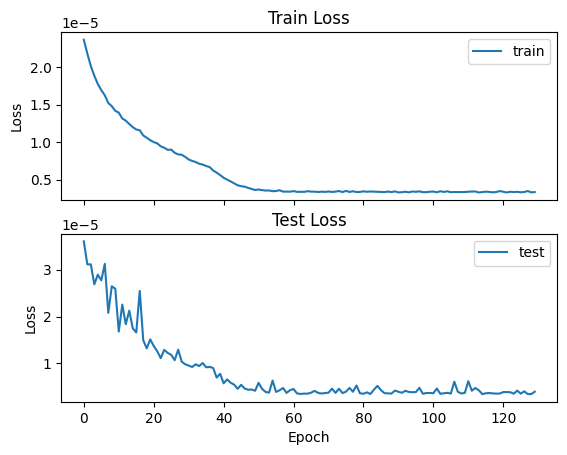

In [ ]:
train_losses, test_losses, val_losses, lstm_model, train_loader, val_loader = train(
  net_class=SimpleLSTM,
  input_size=7,
  hidden_size=5,
  num_layers=1,
  output_size=1,
  lr=0.001,
  batch_size=500,
  num_epochs=150
)


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, dataloader):
    model.eval()
    y_true, y_pred = [], []

    with t.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            y_true.extend(targets.numpy())
            y_pred.extend(outputs.squeeze().numpy())

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}


In [ ]:
val_metrics = evaluate_model(lstm_model, val_loader)
print("Validation Metrics:", val_metrics)


Validation Metrics: {'MSE': 3.349813791194861e-06, 'RMSE': np.float64(0.001830249652696282), 'MAE': 0.001086038712735262, 'R2 Score': 0.9981247675605314}


In [ ]:
import torch as t

# Save trained LSTM model
t.save(lstm_model.state_dict(), "lstm_model.pth")


In [15]:
import torch
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(model, dataloader, dataloader_name="Set"):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            y_true.append(targets.cpu())
            y_pred.append(outputs.cpu())

    # Concatenate all batches
    y_true = torch.cat(y_true).squeeze().view(-1, 1)
    y_pred = torch.cat(y_pred).squeeze().view(-1, 1)

    # ✅ Unscale using dataloader's method
    unscaled_true = dataloader.unscale(y_true).numpy().flatten()
    unscaled_pred = dataloader.unscale(y_pred).numpy().flatten()

    # 📈 Plot
    plt.figure(figsize=(12, 5))
    plt.plot(unscaled_true, label='Actual', alpha=0.7)
    plt.plot(unscaled_pred, label='Predicted', alpha=0.7)
    plt.title(f'Actual vs Predicted CBG - {dataloader_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('CBG Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


SimpleCNN(
  (cnn_layers): Sequential(
    (0): Conv1d(7, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Conv1d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (fc): Linear(in_features=192, out_features=1, bias=True)
)
Epoch 1/150	Train MSE: 0.016249613	Test MSE: 0.005620487	Val MSE: 0.002134645
Epoch 2/150	Train MSE: 0.001525595	Test MSE: 0.003176083	Val MSE: 0.001075709
Epoch 3/150	Train MSE: 0.000885416	Test MSE: 0.002220067	Val MSE: 0.000650099
Epoch 4/150	Train MSE: 0.000617028	Test MSE: 0.001613615	Val MSE: 0.000451958
Epoch 5/150	Train MSE: 0.000443394

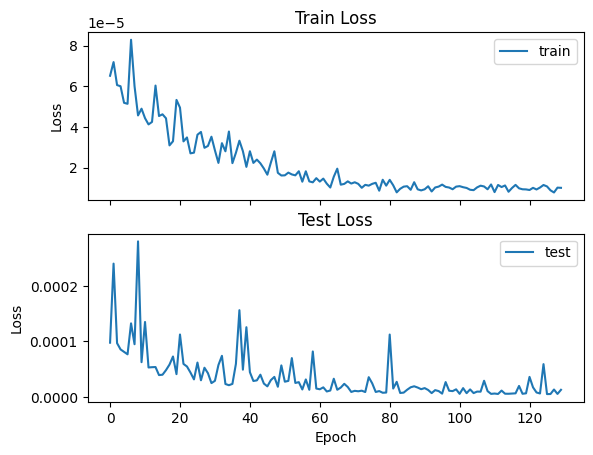

In [ ]:
cnn_train_losses, cnn_test_losses, cnn_val_losses, cnn_model, cnn_train_loader, cnn_val_loader = train(
    net_class=SimpleCNN,
    input_size=7,
    hidden_size=32,     # Number of CNN filters
    num_layers=2,       # Number of CNN layers
    output_size=1,
    lr=0.001,
    batch_size=500,
    num_epochs=150
)



In [ ]:
cnn_val_metrics = evaluate_model(cnn_model, cnn_val_loader)
print("CNN Validation Metrics:", cnn_val_metrics)


CNN Validation Metrics: {'MSE': 8.254139151545571e-06, 'RMSE': np.float64(0.0028730017667146623), 'MAE': 0.002420044735488642, 'R2 Score': 0.9953686294740247}


In [ ]:
# After training is done
torch.save(cnn_model.state_dict(), 'cnn_model.pth')


In [16]:
import torch.nn as nn

class VanillaNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(VanillaNN, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())

        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())

        layers.append(nn.Linear(hidden_size, output_size))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        # Flatten sequence if 3D (batch_size, seq_len, input_size)
        if x.dim() == 3:
            x = x[:, -1, :]  # take the last time step
        return self.net(x)


VanillaNN(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)
Epoch 1/100	Train MSE: 0.022517307	Test MSE: 0.000126016	Val MSE: 0.000050444
Epoch 2/100	Train MSE: 0.000020203	Test MSE: 0.000077925	Val MSE: 0.000019802
Epoch 3/100	Train MSE: 0.000009278	Test MSE: 0.000032043	Val MSE: 0.000009084
Epoch 4/100	Train MSE: 0.000007069	Test MSE: 0.000026589	Val MSE: 0.000007029
Epoch 5/100	Train MSE: 0.000006575	Test MSE: 0.000022641	Val MSE: 0.000006461
Epoch 6/100	Train MSE: 0.000006507	Test MSE: 0.000019781	Val MSE: 0.000006481
Epoch 7/100	Train MSE: 0.000006471	Test MSE: 0.000024216	Val MSE: 0.000007461
Epoch 8/100	Train MSE: 0.000006380	Test MSE: 0.000019751	Val MSE: 0.000006476
Epoch 9/100	Train MSE: 0.000006199	Test MSE: 0.00001

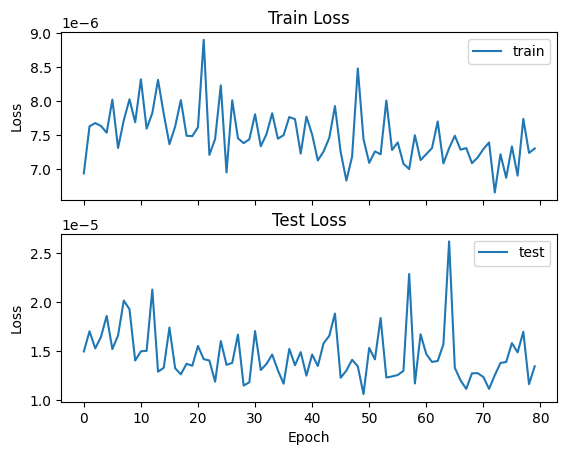

In [ ]:
train_losses, test_losses, val_losses, vanilla_model, train_loader, val_loader = train(
    net_class=VanillaNN,
    input_size=7,
    hidden_size=64,        # you can tweak this
    num_layers=3,          # you can tweak this too
    output_size=1,
    lr=0.001,
    batch_size=500,
    num_epochs=100
)


In [ ]:
val_metrics = evaluate_model(vanilla_model, val_loader)
print("Vanilla NN Validation Metrics:", val_metrics)


Vanilla NN Validation Metrics: {'MSE': 6.3828007610663276e-06, 'RMSE': np.float64(0.0025264205431927457), 'MAE': 0.0017405506638343616, 'R2 Score': 0.9965479054207445}


In [ ]:
torch.save(vanilla_model.state_dict(), '/content/vanilla_model.pth')


In [17]:
import torch as t
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import pandas as pd
import numpy as np


lstm_model = SimpleLSTM(input_size=7, hidden_size=5, num_layers=1, output_size=1)
lstm_model.load_state_dict(t.load('/content/lstm_model.pth'))
lstm_model.eval()

cnn_model = SimpleCNN(input_size=7, hidden_size=32, num_layers=2, output_size=1, seq_len=25)
cnn_model.load_state_dict(t.load('/content/cnn_model.pth'))
cnn_model.eval()


vanilla_model = VanillaNN(input_size=7, hidden_size=64, num_layers=3, output_size=1)
vanilla_model.load_state_dict(t.load('/content/vanilla_model.pth'))
vanilla_model.eval()


# Recreate DataLoaders for LSTM
lstm_train_loader, lstm_val_loader = create_dataloader(
    data_dirs=train_data_dirs,  # Your training directories
    seq_length=25,
    batch_size=500,
    split_val=True
)

# Recreate DataLoaders for CNN
cnn_train_loader, cnn_val_loader = create_dataloader(
    data_dirs=train_data_dirs,
    seq_length=25,
    batch_size=500,
    split_val=True
)

# Recreate DataLoaders for VanillaNN
vanilla_train_loader, vanilla_val_loader = create_dataloader(
    data_dirs=train_data_dirs,
    seq_length=25,
    batch_size=500,
    split_val=True
)


In [18]:
test_loader = create_dataloader(
    data_dirs=test_data_dirs,  # Your test directories
    seq_length=25,
    batch_size=500,
    split_val=False
)[0]  # Because it only returns train_loader


In [19]:
# LSTM Model Evaluation
lstm_val_metrics = evaluate_model(lstm_model, lstm_val_loader)
print("📊 LSTM Validation Metrics:")
for k, v in lstm_val_metrics.items():
    print(f"{k}: {v:.4f}")


📊 LSTM Validation Metrics:
MSE: 0.0000
RMSE: 0.0017
MAE: 0.0011
R2 Score: 0.9982


In [20]:
# CNN Model Evaluation
cnn_val_metrics = evaluate_model(cnn_model, cnn_val_loader)
print("\n📊 CNN Validation Metrics:")
for k, v in cnn_val_metrics.items():
    print(f"{k}: {v:.4f}")



📊 CNN Validation Metrics:
MSE: 0.0000
RMSE: 0.0029
MAE: 0.0024
R2 Score: 0.9946


In [21]:
# VanillaNN Model Evaluation
vanilla_val_metrics = evaluate_model(vanilla_model, vanilla_val_loader)
print("\n📊 VanillaNN Validation Metrics:")
for k, v in vanilla_val_metrics.items():
    print(f"{k}: {v:.4f}")



📊 VanillaNN Validation Metrics:
MSE: 0.0000
RMSE: 0.0025
MAE: 0.0017
R2 Score: 0.9962


In [22]:
import matplotlib.pyplot as plt
import torch

def plot_actual_vs_predicted(model, dataloader, model_name="Model", dataloader_name="Set"):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            y_true.extend(targets.squeeze().cpu().numpy())
            y_pred.extend(outputs.squeeze().cpu().numpy())

    # Unscale if method exists
    if hasattr(dataloader, 'unscale'):
        y_true = dataloader.unscale(torch.tensor(y_true).view(-1, 1)).numpy().flatten()
        y_pred = dataloader.unscale(torch.tensor(y_pred).view(-1, 1)).numpy().flatten()

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(y_true, label="Actual", alpha=0.7)
    plt.plot(y_pred, label="Predicted", alpha=0.7)
    plt.title(f"{model_name} - Actual vs Predicted ({dataloader_name})")
    plt.xlabel("Time Steps")
    plt.ylabel("CBG Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


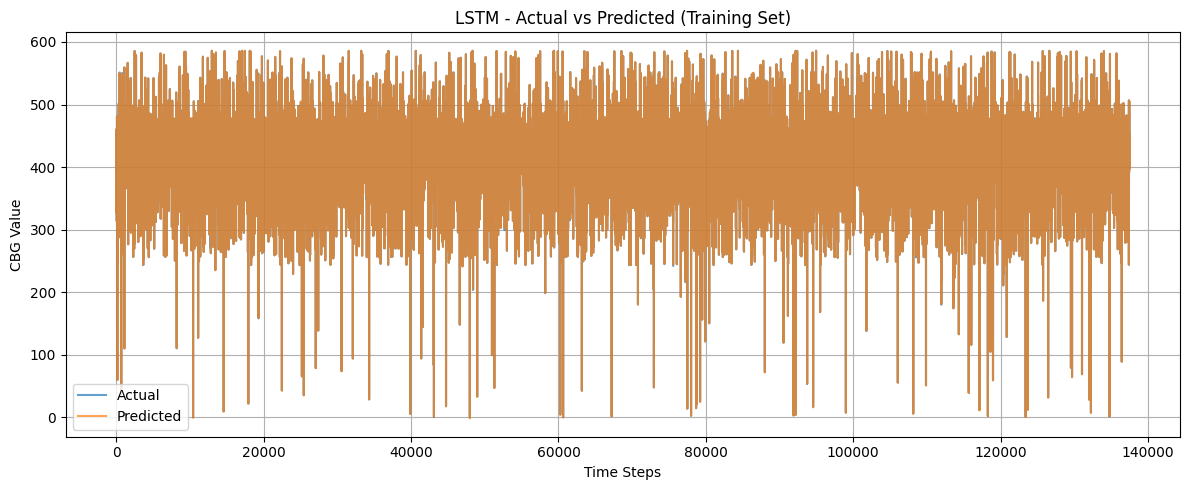

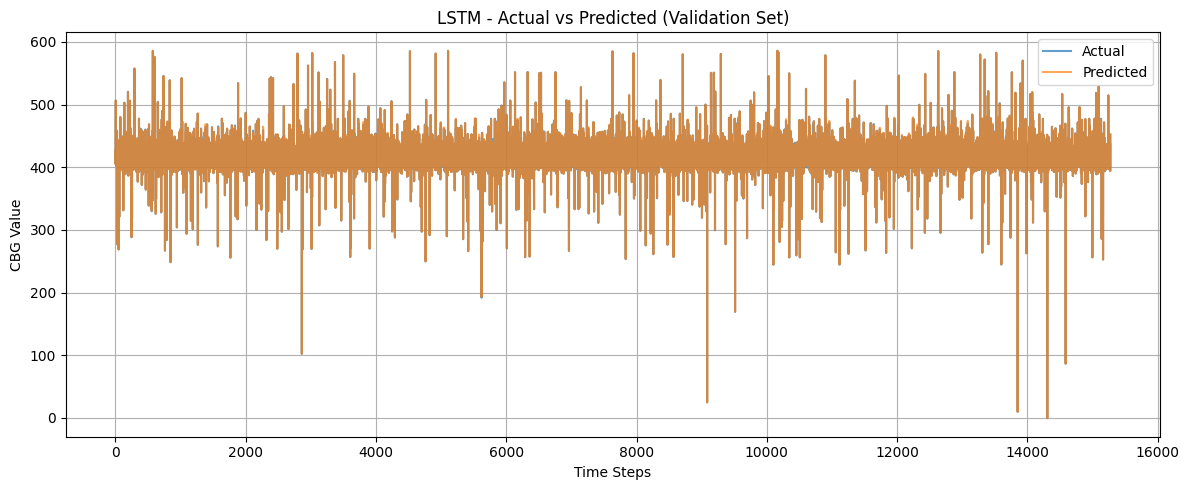

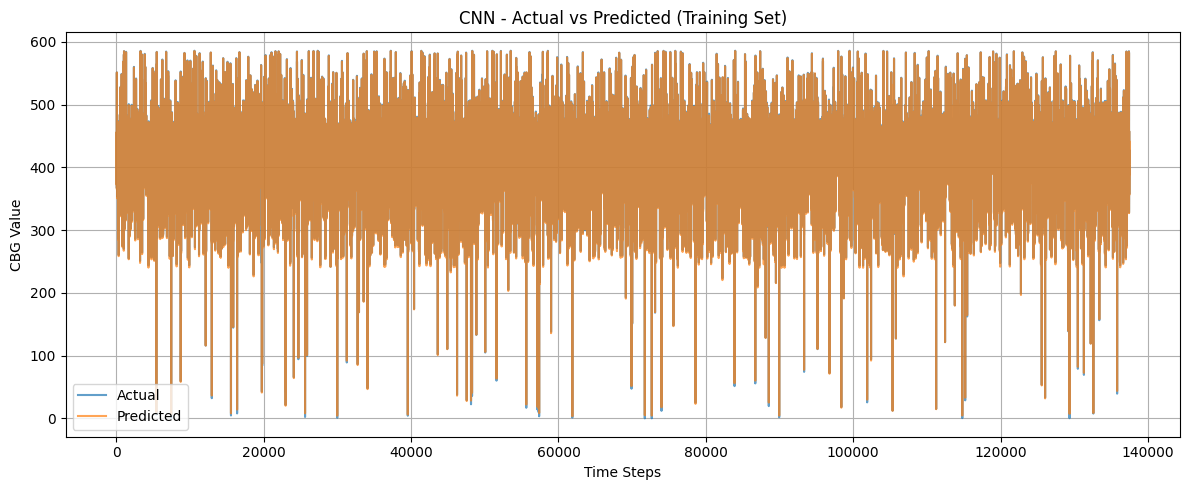

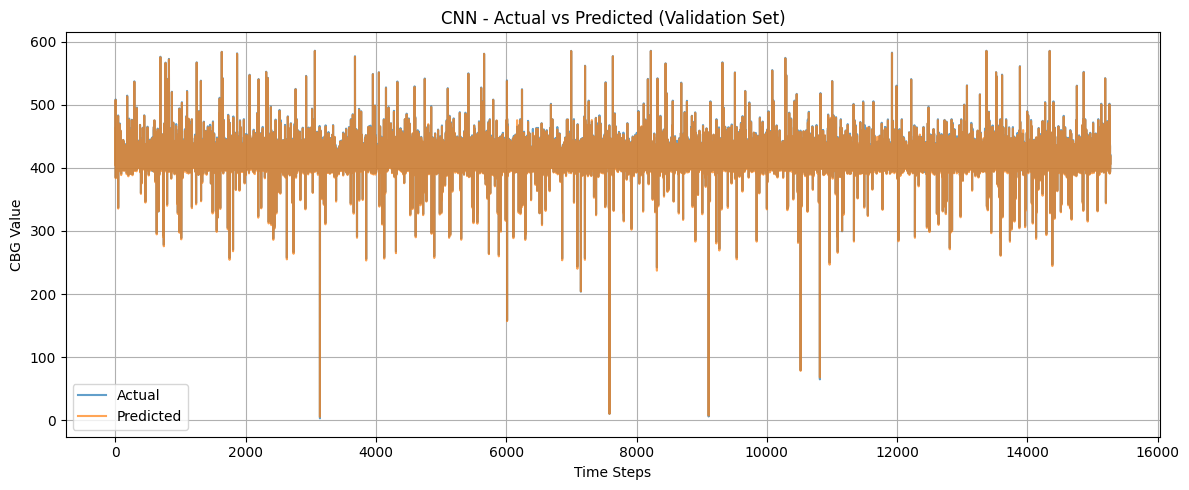

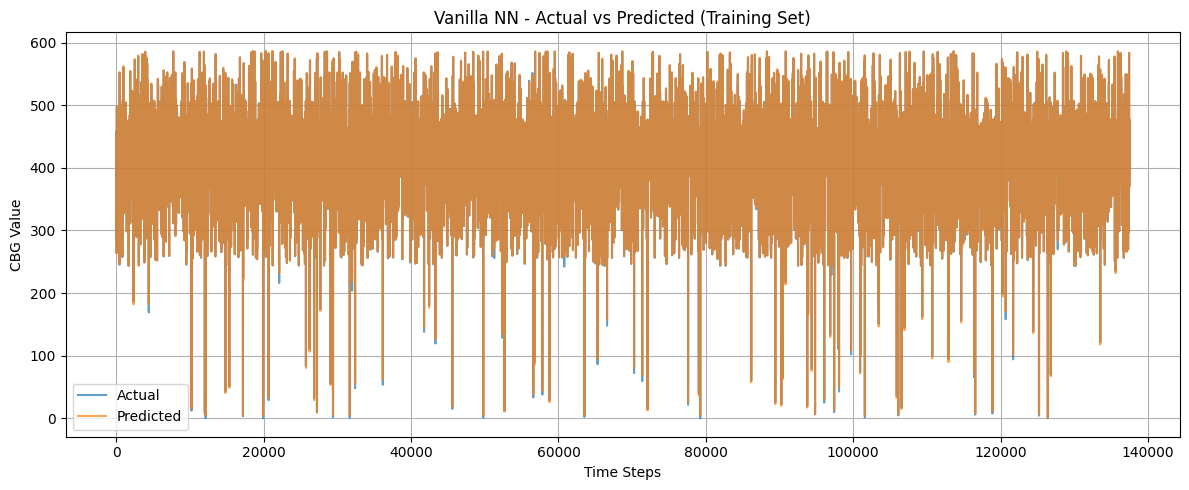

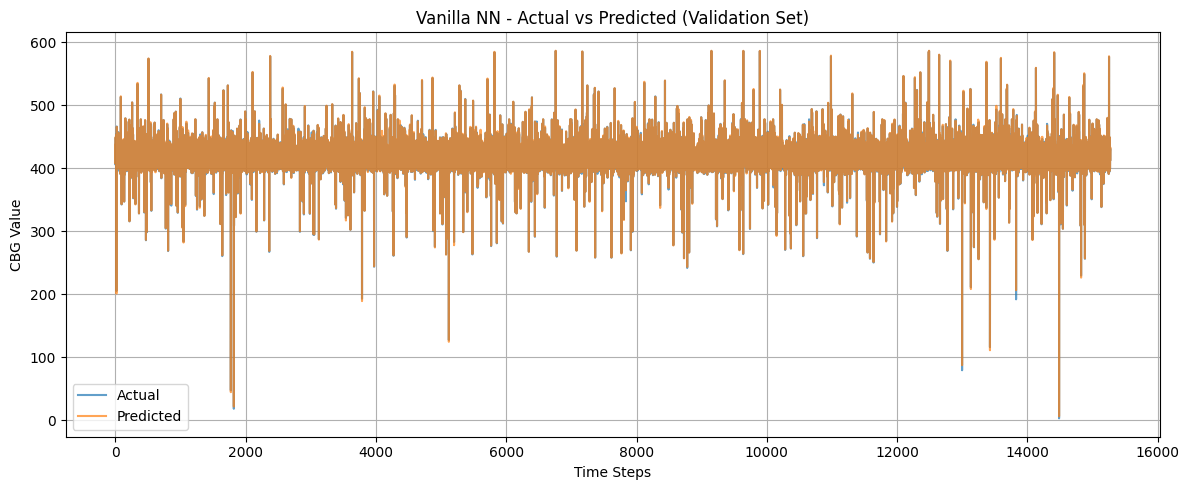

In [35]:
# LSTM
plot_actual_vs_predicted(lstm_model, lstm_train_loader, model_name="LSTM", dataloader_name="Training Set")
plot_actual_vs_predicted(lstm_model, lstm_val_loader, model_name="LSTM", dataloader_name="Validation Set")

# CNN
plot_actual_vs_predicted(cnn_model, cnn_train_loader, model_name="CNN", dataloader_name="Training Set")
plot_actual_vs_predicted(cnn_model, cnn_val_loader, model_name="CNN", dataloader_name="Validation Set")

# Vanilla NN
plot_actual_vs_predicted(vanilla_model, vanilla_train_loader, model_name="Vanilla NN", dataloader_name="Training Set")
plot_actual_vs_predicted(vanilla_model, vanilla_val_loader, model_name="Vanilla NN", dataloader_name="Validation Set")
